$$\textbf{Optimización I. Tarea 1}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)


Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 1}$

In [133]:
def seccion_dorada(f,x_l,x_u,epsilon,N):
    '''
    Esta función busca el mínimo de f en el intervalo [x_l,x_u] 
    argumentos: 
        f: funcion a optimizar
        x_l,x_u: limites inferior y superior del intervalo de busqueda
        epsilon: tolerancia
        N: número máximo de iteraciones
    returns:
        x_k: el punto donde se minimiza f
        x_l,x_u: intervalo donde se ecunetra el minimo (intervalo de incertidumbre)
        k: número de iteraciones realizadas
        b_res: true si el algoritmo terminó porque se cumplió el criterio de paso
    '''

    rho=(sqrt(5)-1)/(2)

    for i in range(N):
        b=rho*(x_u-x_l)
        x_1=x_u-b
        x_3=x_l+b
        if f(x_1)<f(x_3):
            x_u=x_3
            x_k=x_1
        else:
            x_l=x_1
            x_k=x_3
        
        if np.abs(x_u-x_l) < epsilon:
            return x_k,x_l,x_u,i,True
    
    return x_3,x_l,x_u,i,False

In [13]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


In [14]:
#Funciones en las que probaremos el algoritmo de Selección Dorada
# Función objetivo 1
def f1(x): 
    return -0.05*x**3 + 8*x + 3

# Función objetivo 2
def f2(x): 
    return 1.5*x**4 - 3*x**2 + 2

def f3(x): 
    return -(x + np.sin(x))*np.exp(-x**2)


#Numero máximo de iteraciones y tolerancia quue usaremos
n=50
e = (np.finfo(float).eps)**(1/3)



$f_1(x)=-0.05x^3 + 8x + 3$

In [92]:
f1_xl = -20
f1_xu =  20
x_m1,xl1,xu1,f1_iteraciones,f1_bool=seccion_dorada(f1,f1_xl,f1_xu,e,n)

if f1_bool:
    print("La función f1 alcanza un mínimo en",x_m1,"\ndentro del intervalo (",xl1,",",xu1,") a las", f1_iteraciones, "iteraciones")
else:
    print("Se alcanzó al número máximo de iteraciones y no se cumplió el criterio de paso. x_m:", x_m1,"x_l:",xl1,"x_u:",xu1)


La función f1 alcanza un mínimo en -7.302967212715323 
dentro del intervalo ( -7.302970349467607 , -7.302965274095799 ) a las 32 iteraciones


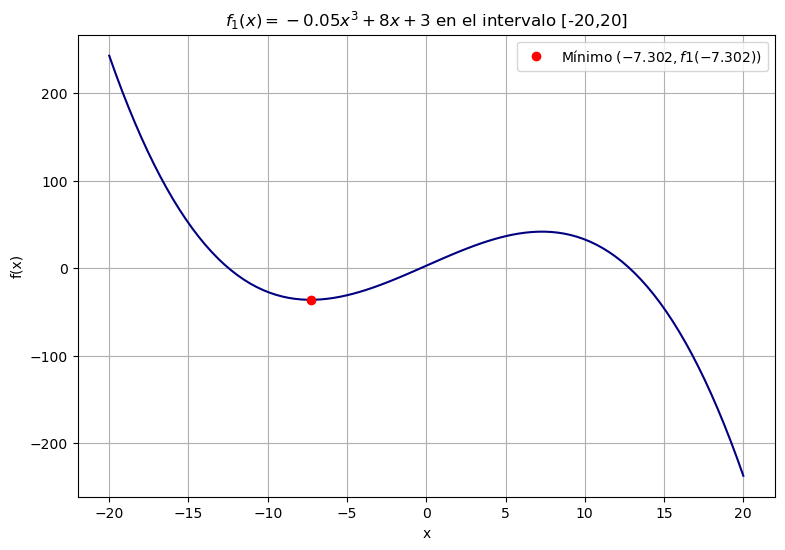

In [93]:
xx_1 = np.linspace(f1_xl, f1_xu, 100)

plt.figure(figsize=(9,6)) 
plt.plot(xx_1,f1(xx_1),'navy')
plt.plot(x_m1,f1(x_m1),'ro',label="Mínimo $(-7.302,f1(-7.302))$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.title('$f_1(x)=-0.05x^3 + 8x + 3$ en el intervalo [-20,20]')
plt.grid()

$f_2(x)=1.5x^4 - 3x^2 + 2$


In [94]:
f2_xl = -2
f2_xu =  2
#aquí se implemento el método con 50 iteraciones, con 100 y finalmente con 1000 y no se llega al mínimo
x_m2,xl2,xu2,f2_iteraciones,f2_bool=seccion_dorada(f2,f2_xl,f2_xu,e,n)

if f2_bool:
    print("La función f2 alcanza un mínimo en",x_m2,"\ndentro del intervalo (",xl2,",",xu2,") a las", f2_iteraciones, "iteraciones")
else:
    print("Se alcanzó al número máximo de iteraciones y no se cumplió el criterio de paso. x_m:", x_m2,"x_l:",xl2,"x_u:",xu2)

La función f2 alcanza un mínimo en 1.0000005374904997 
dentro del intervalo ( 0.9999983875285002 , 1.0000040162020893 ) a las 27 iteraciones


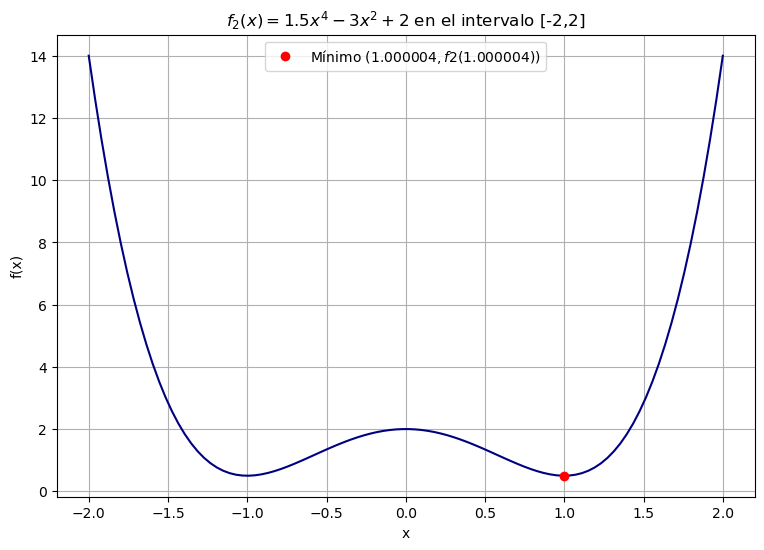

In [101]:
xx_2 = np.linspace(f2_xl, f2_xu, 100)

plt.figure(figsize=(9,6)) 
plt.plot(xx_2,f2(xx_2),'navy')
plt.plot(x_m2,f2(x_m2),'ro',label="Mínimo $(1.000004,f2(1.000004))$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.title('$f_2(x)=1.5x^4 - 3x^2 + 2$ en el intervalo [-2,2]')
plt.grid()

$f_3(x)=-(x + sin(x))exp(-x^2)$

In [96]:
f3_xl = -10
f3_xu =  10
#aquí se implemento el método con 50 iteraciones, con 100 y finalmente con 1000 y no se llega al mínimo
x_m3,xl3,xu3,f3_iteraciones,f3_bool=seccion_dorada(f3,f3_xl,f3_xu,e,n)

if f3_bool:
    print("La función f3 alcanza un mínimo en",x_m3,"\ndentro del intervalo (",xl3,",",xu3,") a las", f3_iteraciones, "iteraciones")
else:
    print("Se alcanzó al número máximo de iteraciones y no se cumplió el criterio de paso. x_m:", x_m3,"x_l:",xl3,"x_u:",xu3)

La función f3 alcanza un mínimo en 0.6795782938545382 
dentro del intervalo ( 0.6795767254783963 , 0.6795808315404427 ) a las 31 iteraciones


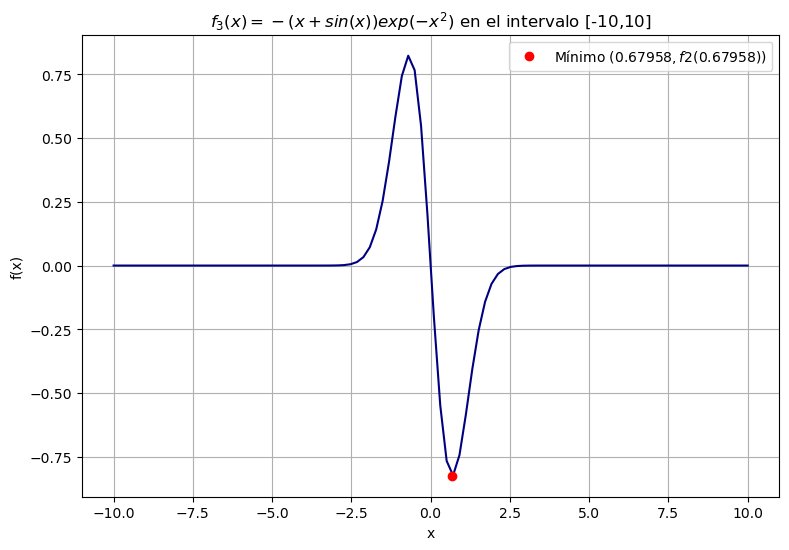

In [102]:
xx_3 = np.linspace(f3_xl, f3_xu, 100)

plt.figure(figsize=(9,6)) 
plt.plot(xx_3,f3(xx_3),'navy')
plt.plot(x_m3,f3(x_m3),'ro',label="Mínimo $(0.67958,f2(0.67958))$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.title('$f_3(x)=-(x + sin(x))exp(-x^2)$ en el intervalo [-10,10]')
plt.grid()

<font size=4.5 color='lightblue'>

$\textit{Ejercicio 2}$

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

In [105]:
def f(x):
    return ((x[0]**2 + x[1]**2)/4000.0) - (np.cos(x[0])*np.cos(x[1]/np.sqrt(2)) + 1)

def g(x, t, d):
    return f(x + t*d)

De manera analítica, el gradiente está dado por:

$$\nabla f=\begin{bmatrix}
\dfrac{x_1}{2000}+\sin(x_1)\cos\left(\dfrac{x_2}{\sqrt{2}}\right)\\
\dfrac{x_2}{2000}+\dfrac{1}{\sqrt{2}}\cos(x_1)\sin\left(\dfrac{x_2}{\sqrt{2}}\right)
\end{bmatrix}$$

In [109]:
def Df(x):
    d1f = (x[0]/2000.0)+np.sin(x[0]) * np.cos(x[1]/np.sqrt(2.0)) 
    d2f = (x[1]/2000.0)+(1/np.sqrt(2.0))* np.cos(x[0]) * np.sin(x[1]/np.sqrt(2.0))
    return d1f ,d2f 

In [110]:
x_0 = np.array([3,0.5])
p = np.array([2,1])
d_0 = np.array([2,1])/sqrt(5)
g_0 = Df(x_0)/np.linalg.norm(Df(x_0))

In [114]:
#derivada direccional en d0
direccional_d0 = np.dot(Df(x_0), d_0)
print("La derivada direccional de f(x0) en la dirección d0 es", direccional_d0)

La derivada direccional de f(x0) en la dirección d0 es 0.011475034596120016


In [116]:
#derivada direccional en d0
direccional_g0 = np.dot(Df(x_0), g_0)
print("La derivada direccional de f(x0) en la dirección -g0 es", -1*direccional_g0)

La derivada direccional de f(x0) en la dirección -g0 es -0.27667848944420204


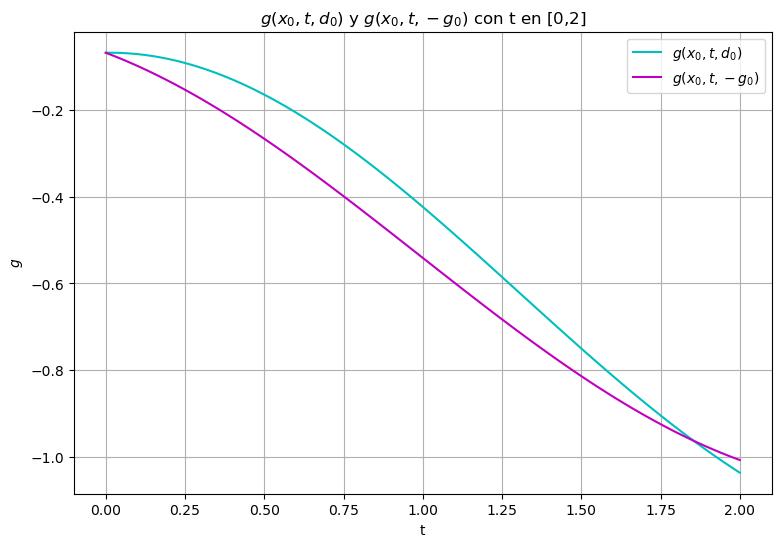

In [128]:
#grafica de la funcion g en direccion d0 y g0 con t en el intervalo 0,2
t = np.linspace(0, 2, 100)

g_d0 = [g(x_0, lista, d_0) for lista in t]
g_g0 = [g(x_0, lista, -1*g_0) for lista in t]

plt.figure(figsize=(9,6)) 
plt.plot(t,g_d0,'c',label="$g(x_0,t,d_0)$")
plt.plot(t,g_g0,'m',label="$g(x_0,t,-g_0)$")
plt.ylabel('$g$')
plt.xlabel('t')
plt.legend()
plt.title('$g(x_0,t,d_0)$ y $g(x_0,t,-g_0)$ con t en [0,2]')
plt.grid()

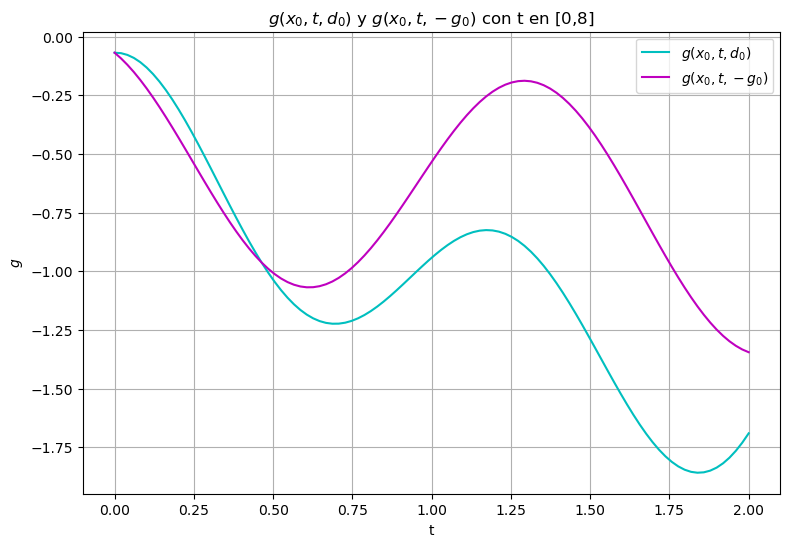

In [127]:
#grafica de la funcion g en direccion d0 y g0 con t en el intervalo 0,2
t1 = np.linspace(0, 8, 100)

g_d0_8 = [g(x_0, lista, d_0) for lista in t1]
g_g0_8 = [g(x_0, lista, -1*g_0) for lista in t1]

plt.figure(figsize=(9,6)) 
plt.plot(t,g_d0_8,'c',label="$g(x_0,t,d_0)$")
plt.plot(t,g_g0_8,'m',label="$g(x_0,t,-g_0)$")
plt.ylabel('$g$')
plt.xlabel('t')
plt.legend()
plt.title('$g(x_0,t,d_0)$ y $g(x_0,t,-g_0)$ con t en [0,8]')
plt.grid()

In [134]:
#definimos una nueva funcion g que sólo depende de t
def g_g_0(t):
    return g(x_0, t, -1*g_0)

In [138]:
g_xl = 0
g_xu =  2
#aquí se implemento el método con 50 iteraciones, con 100 y finalmente con 1000 y no se llega al mínimo
x_m,xl,xu,g_iteraciones,g_bool=seccion_dorada(g_g_0,g_xl,g_xu,e,n)

if g_bool:
    print("La función g alcanza un mínimo en",x_m,"\ndentro del intervalo (",xl,",",xu,") a las", g_iteraciones, "iteraciones")
else:
    print("Se alcanzó al número máximo de iteraciones y no se cumplió el criterio de paso. x_m:", x_m,"x_l:",xl,"x_u:",xu)

La función g alcanza un mínimo en 1.9999971856632055 
dentro del intervalo ( 1.9999954463074106 , 2 ) a las 26 iteraciones


In [139]:
#x1
x1 = x_0 - x_m * g_0
#f en x_0 y x1
f_x_0 = f(x_0)
f_x1 = f(x1)
# Imprimimos los resultados
print("x_0:", x_0)
print("f(x_0):", f_x_0)
print("t0:", x_m)
print("x1:", x1)
print("f(x1):", f_x1)

x_0: [3.  0.5]
f(x_0): -0.06892768761246787
t0: 1.9999971856632055
x1: [2.03215236 2.25021704]
f(x1): -1.0067589998471111


In [140]:
g_xl = 0
g_xu =  8
#aquí se implemento el método con 50 iteraciones, con 100 y finalmente con 1000 y no se llega al mínimo
x_m,xl,xu,g_iteraciones,g_bool=seccion_dorada(g_g_0,g_xl,g_xu,e,n)

if g_bool:
    print("La función g alcanza un mínimo en",x_m,"\ndentro del intervalo (",xl,",",xu,") a las", g_iteraciones, "iteraciones")
else:
    print("Se alcanzó al número máximo de iteraciones y no se cumplió el criterio de paso. x_m:", x_m,"x_l:",xl,"x_u:",xu)

La función g alcanza un mínimo en 2.4561060376666815 
dentro del intervalo ( 2.456103380167501 , 2.4561076800915003 ) a las 29 iteraciones


In [141]:
#x1
x1 = x_0 - x_m * g_0
#f en x_0 y x1
f_x_0 = f(x_0)
f_x1 = f(x1)
# Imprimimos los resultados
print("x_0:", x_0)
print("f(x_0):", f_x_0)
print("t0:", x_m)
print("x1:", x1)
print("f(x1):", f_x1)

x_0: [3.  0.5]
f(x_0): -0.06892768761246787
t0: 2.4561060376666815
x1: [1.81143011 2.64936234]
f(x1): -1.0684412136036607


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 3}$

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la
función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.



El gradiente se define como:

$$\nabla f(\mathbf{x})=[\partial_1 f,\partial_2 f,... \partial_n f]^\top$$

La i-esima parcial en indices:


$$
\begin{align*}
    \frac{\partial }{\partial x_i }f(\mathbf{x}) &= \partial _i \left(  a_j x_j \cdot  b_k x_k \right) \\
    &= a_j x_j \partial _i  (b_k x_k ) +  b_k x_k  \partial _i (a_j x_j)\\
    &= a_j x_j b_k \delta_{ik} +  b_k x_k a_j  \delta_{ij} \\
    &= a_j x_j b_i +  b_k x_k a_i \\
\end{align*}
$$


Donde usamos notación de índices

$$
\begin{align*}
    \mathbf{a}^\top \mathbf{x} &= \sum_{i=1}^{n} a_i x_i = a_i x_i 
\end{align*}
$$

y análogo para $\mathbf{b}^\top \mathbf{x}$. Por lo que podemos escribir el gradiente como:

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\sum_{j=1}^{n} (a_j x_j b_1 + b_j x_j a_1) \\
\sum_{j=1}^{n} (a_j x_j b_2 + b_j x_j a_2) \\
\vdots \\
\sum_{j=1}^{n} (a_j x_j b_n + b_j x_j a_n)
\end{bmatrix}
$$

Para obtener la Hessiana, debemos derivar una vez más. Siguiendo el mismo procedimiento con índices, llegamos a:

$$\dfrac{\partial ^2f}{\partial x_l\partial x_i}=\partial_l( a_j x_j b_i +  b_k x_k a_i )=a_j b_i \delta_{lj}+b_k a_i\delta_{lk}=a_l b_i +b_l a_i$$

Por lo que:

$$H(f)=\mathbf{a}\mathbf{b}^t+\mathbf{b}\mathbf{a}^t.$$


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 4}$

Tenemos los valores de la derivada direccional $\frac{\partial f}{\partial \mathbf{p}_i}$ 
de $f$ en el punto $\mathbf{x}_0$ para tres direcciones $\mathbf{p}_i$:

$$ \frac{\partial f}{\partial \mathbf{p}_1}(\mathbf{x}_0) = \frac{3}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_1 = \left(0,\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_2}(\mathbf{x}_0) = \frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_2 = \left(\frac{1}{\sqrt{2}},0,\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_3}(\mathbf{x}_0) = -\frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_3 = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \right)^\top.$$

A partir de esto, calcule el vector gradiente $\nabla f(\mathbf{x}_0)$.

De acuerdo con los valores dados, sabemos que las derivadas direccionales deben satisfacer que:

$$\begin{array}{lcc} \mathbf{p}_1^\top\nabla f(\mathbf{x}_0)=\dfrac{3}{\sqrt{2}}\\ \mathbf{p}_2^\top\nabla f(\mathbf{x}_0)=\dfrac{1}{\sqrt{2}}\\\mathbf{p}_3^\top\nabla f(\mathbf{x}_0)=-\dfrac{1}{\sqrt{2}} \end{array} \quad\quad ...(1)$$



Nosotros buscamos el gradiente de $f$ o bien los valores $\alpha_{1}$, $\alpha_{2}$ y $\alpha_{3}$, donde:
$$\nabla f(\mathbf{x}_0)=\begin{pmatrix}
\alpha_1\\
\alpha_2\\
\alpha_3
\end{pmatrix}$$

Sustituyendo la expresión anterior en el sistema de ecuaciones (1) y distribuimos:
$$\begin{array}{lcc} \dfrac{1}{\sqrt{2}}(a_2+a_3)=\dfrac{3}{\sqrt{2}}\\ \dfrac{1}{\sqrt{2}}(a_1+a_3)=\dfrac{1}{\sqrt{2}}\\\dfrac{1}{\sqrt{2}}(a_1+a_2)=-\dfrac{1}{\sqrt{2}}\end{array}$$



por lo que, despejando

$$ \alpha_{2} = 3 - \alpha_{3} $$

$$ \alpha_{1} = 1- \alpha_{3}  $$

$$ \alpha_{1} = -1-\alpha_{2} $$

Finalmtene, sustituyendo:

$$\nabla f(\mathbf{x}_0)=\begin{pmatrix}
-\dfrac{3}{2}\\
\dfrac{1}{2}\\
\dfrac{5}{2}
\end{pmatrix}$$



